In [57]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [58]:
def local_contrast_normalisation(img, kernel_size=5):
  '''
  Local contrast normalisation of image, preserving original dimensons.

  Used to adjust uneven lighting and remove shading artefacts. Individual pixels
  are normalised using the mean and standard deviation of its neighbouring pixels.
  '''
  # store original image dimensions
  img_height, img_width = img.shape

  # preserve the dimensions of the original image before using convolution kernel
  img = np.pad(img, mode='reflect', pad_width=kernel_size//2).astype(np.float32)

  k_height, k_width = (kernel_size, kernel_size)

  # local contrast normalisation of original image.
  # The operation is NOT done in place to prevent propagation of values from previous windows.
  new_img = np.zeros((img_height, img_width))
  for i in range(img_height):
    for j in range(img_width):
      # calculate receptive field mean and standard deviation
      mean = np.mean(img[i:i + k_height, j:j + k_width])
      stdd = np.std(img[i:i + k_height, j:j + k_width])
      # z score normalisation (check for zero in denominator)
      new_img[i][j] = (img[i][j] - mean) / (max(stdd, 1e-8))

  # normalise new image to [0, 1]
  new_img = (new_img - new_img.min()) / (new_img.max() - new_img.min())
  # convert to [0, 255]
  new_img = new_img * 255.0

  assert(new_img.shape == (img_height, img_width))
  return new_img

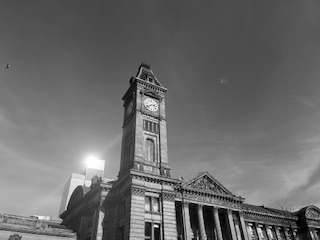

In [59]:
# open image as greyscale
image = Image.open('birmingham.jpg').convert('L')
image = np.asarray(image).astype(np.float32)
# show image
cv2_imshow(image)

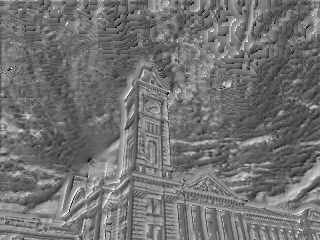

In [60]:
# normalise image
n_image = local_contrast_normalisation(image)
# show normalised image
cv2_imshow(n_image)